<a href="https://colab.research.google.com/github/your-repo/Affinity_Propagation_Full_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import kagglehub
import os

##  Set Random Seed

In [ ]:
seed = 0
np.random.seed(seed)

##  Dataset 1: Iris Dataset

In [ ]:
path = kagglehub.dataset_download("himanshunakrani/iris-dataset")
iris = pd.read_csv(os.path.join(path, "iris.csv"))
iris = iris.dropna()
X = iris.drop(columns=['species'])
y = iris['species']

100%|██████████| 0.98k/0.98k [00:00<00:00, 1.61MB/s]

Extracting files...


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
iris_df = X.copy()
iris_df['target'] = y

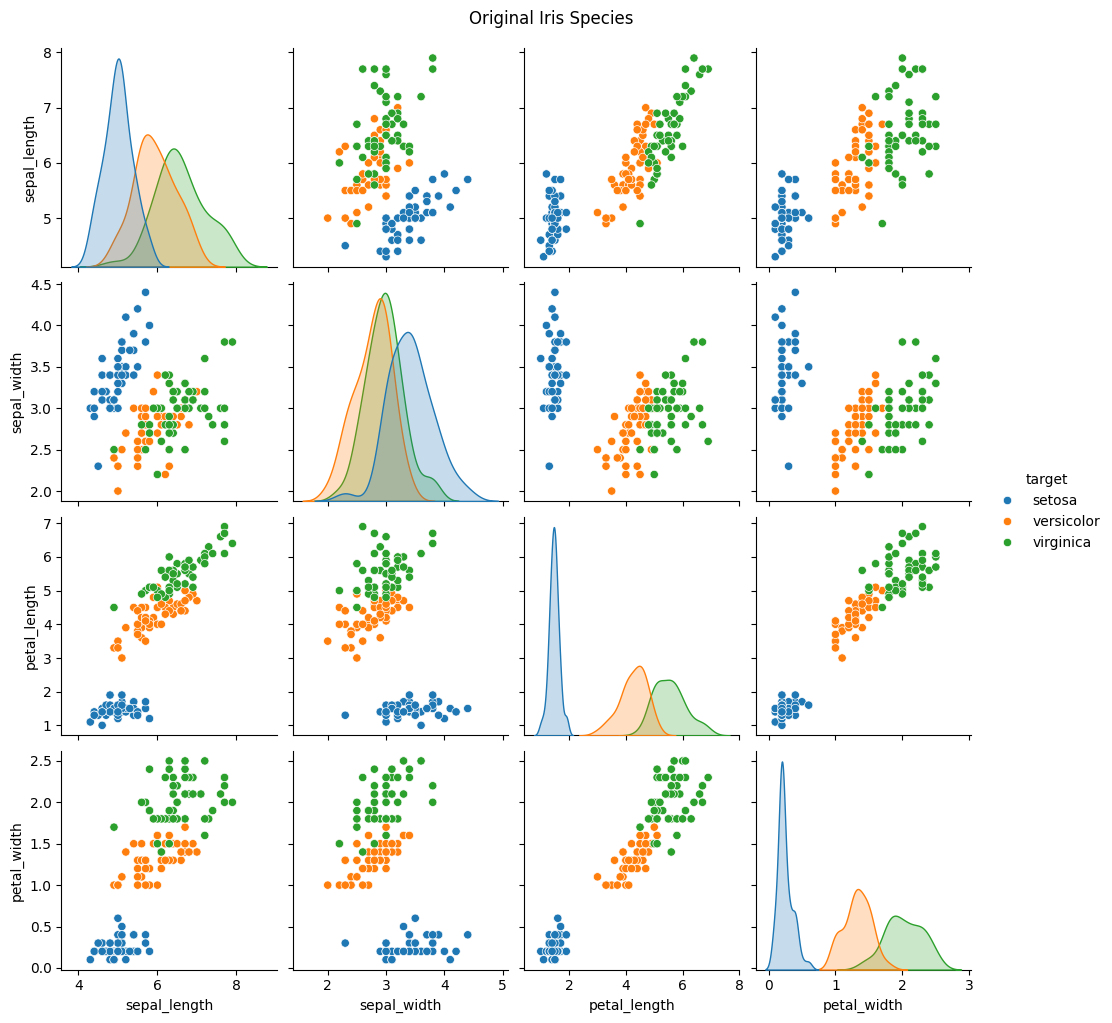

In [ ]:
sns.pairplot(iris_df, hue='target')
plt.suptitle('Original Iris Species', y=1.02)
plt.show()

### Sklearn Affinity Propagation (Iris)

In [ ]:
ap = AffinityPropagation(random_state=seed)
ap.fit(X_scaled)
iris_df['sklearn_ap'] = ap.labels_

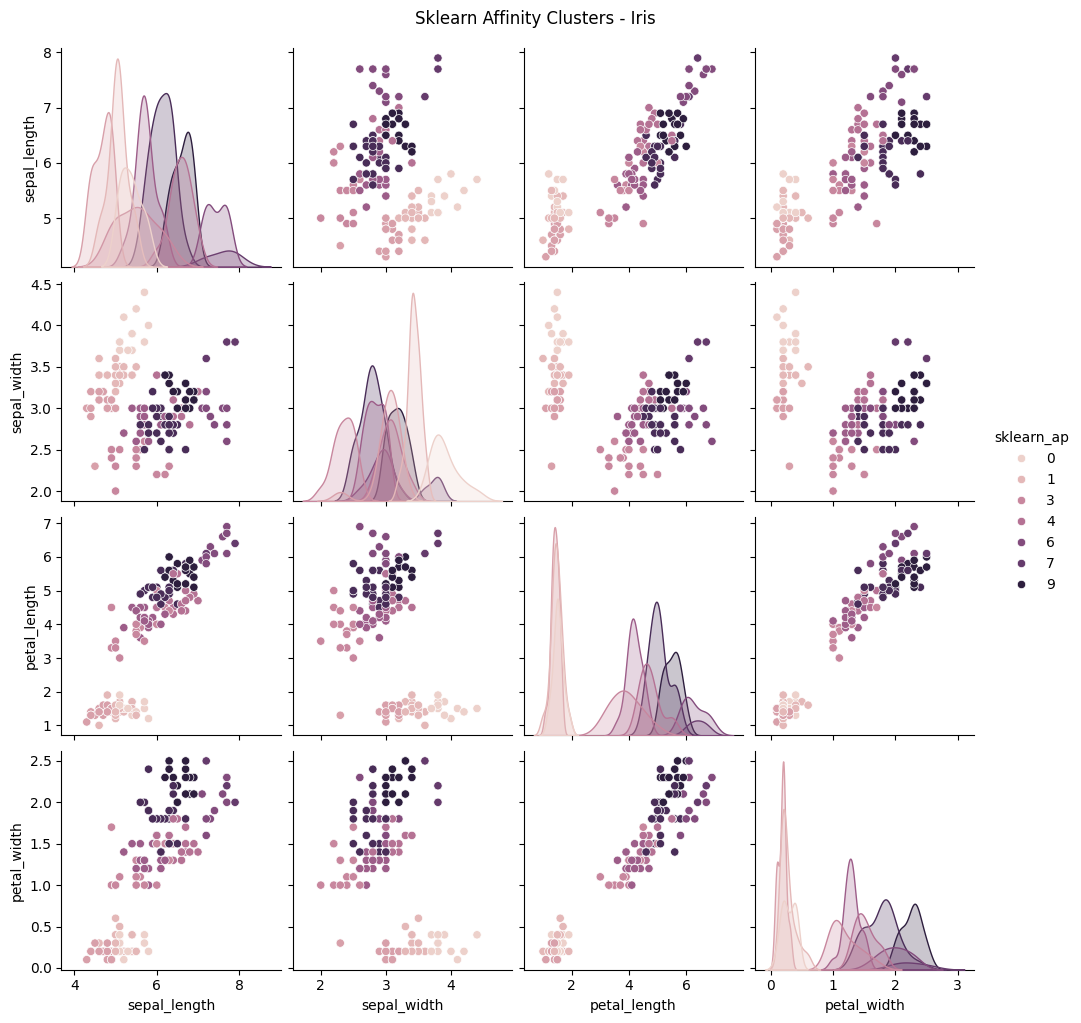

In [ ]:
sns.pairplot(iris_df, hue='sklearn_ap')
plt.suptitle('Sklearn Affinity Clusters - Iris', y=1.02)
plt.show()

In [ ]:
iris_score_sklearn = silhouette_score(X_scaled, ap.labels_)
print(f'Silhouette Score (Sklearn - Iris): {iris_score_sklearn:.3f}')

Silhouette Score (Sklearn - Iris): 0.343


### Custom Affinity Propagation (Iris)

In [ ]:
class AffinityPropagationCustom:
    def __init__(self, damping=0.5, max_iter=300, conv_iter=15, preference=None):
        self.damping = damping
        self.max_iter = max_iter
        self.conv_iter = conv_iter
        self.preference = preference

    def fit(self, X):
        n = X.shape[0]
        S = -euclidean_distances(X, squared=True)
        A = np.zeros((n, n))
        R = np.zeros((n, n))
        if self.preference is None:
            self.preference = np.median(S)
        np.fill_diagonal(S, self.preference)
        for iter in range(self.max_iter):
            R_old = R.copy()
            A_old = A.copy()
            AS = A + S
            max_S = np.partition(AS, -2, axis=1)[:, -2]
            R = S - max_S[:, np.newaxis]
            R = (1 - self.damping) * R + self.damping * R_old
            R_pos = np.maximum(0, R)
            np.fill_diagonal(R_pos, 0)
            A_new = np.minimum(0, R + np.sum(R_pos, axis=0, keepdims=True))
            np.fill_diagonal(A_new, np.sum(R_pos, axis=0))
            A = (1 - self.damping) * A_new + self.damping * A_old
            if np.allclose(R, R_old) and np.allclose(A, A_old):
                break
        exemplars = np.argmax(A + R, axis=1)
        unique_exemplars = np.unique(exemplars)
        cluster_map = {exemplar: idx for idx, exemplar in enumerate(unique_exemplars)}
        labels = np.array([cluster_map[exemplars[i]] for i in range(n)])
        self.labels_ = labels
        self.exemplars_ = unique_exemplars
        return self

In [ ]:
ap_custom = AffinityPropagationCustom(damping=0.6)
ap_custom.fit(X_scaled)
iris_df['custom_ap'] = ap_custom.labels_

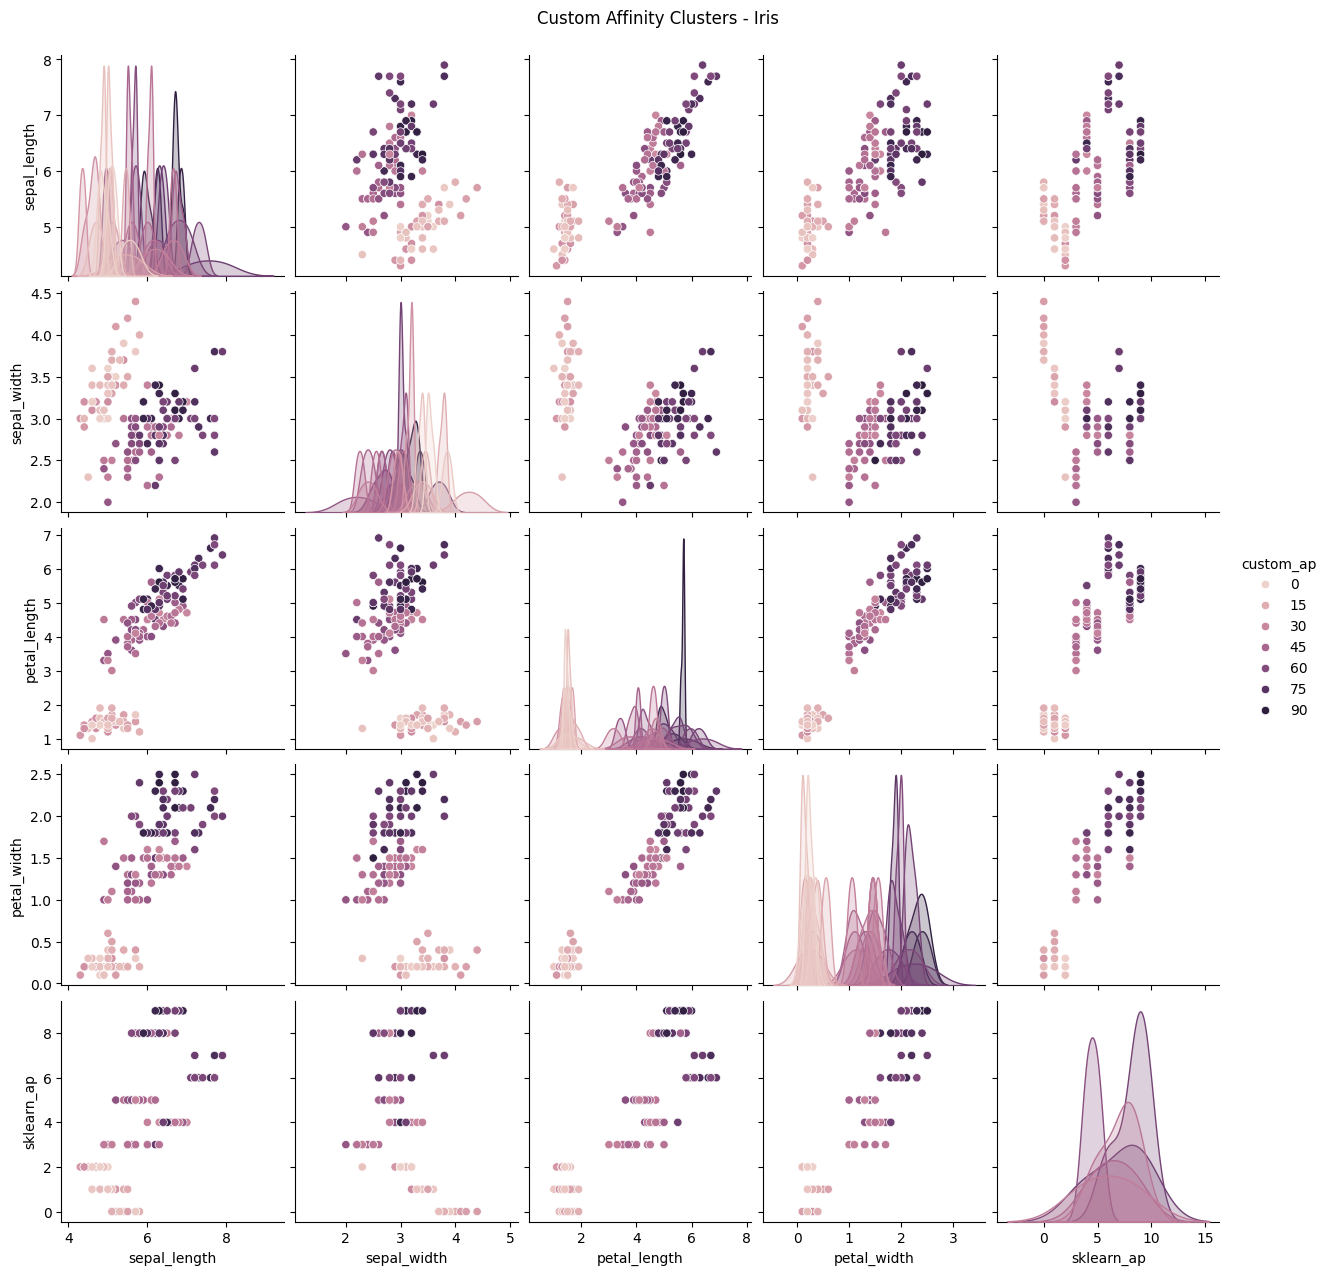

In [ ]:
sns.pairplot(iris_df, hue='custom_ap')
plt.suptitle('Custom Affinity Clusters - Iris', y=1.02)
plt.show()

In [ ]:
iris_score_custom = silhouette_score(X_scaled, ap_custom.labels_)
print(f'Silhouette Score (Custom - Iris): {iris_score_custom:.3f}')

Silhouette Score (Custom - Iris): -0.204


##  Dataset 2: AI Index Dataset

In [ ]:
path = kagglehub.dataset_download("katerynameleshenko/ai-index")
ai = pd.read_csv(os.path.join(path, "AI_index_db.csv"))
ai = ai.dropna()
X_ai = ai.select_dtypes(include='number').drop(columns=['Total score'])
X_ai_scaled = StandardScaler().fit_transform(X_ai)


100%|██████████| 2.38k/2.38k [00:00<00:00, 2.90MB/s]

Extracting files...


In [ ]:
ap_ai = AffinityPropagation(random_state=seed).fit(X_ai_scaled)
ai['sklearn_ap'] = ap_ai.labels_
ai_score_sklearn = silhouette_score(X_ai_scaled, ap_ai.labels_)
print(f'Silhouette Score (Sklearn - AI Index): {ai_score_sklearn:.3f}')

Silhouette Score (Sklearn - AI Index): 0.230


###  Visualize Clusters - AI Index Dataset

In [ ]:
ap_custom_ai = AffinityPropagationCustom().fit(X_ai_scaled)
ai['custom_ap'] = ap_custom_ai.labels_
ai_score_custom = silhouette_score(X_ai_scaled, ap_custom_ai.labels_)
print(f'Silhouette Score (Custom - AI Index): {ai_score_custom:.3f}')

Silhouette Score (Custom - AI Index): -0.170


###  Visualize Clusters - AI Index Dataset

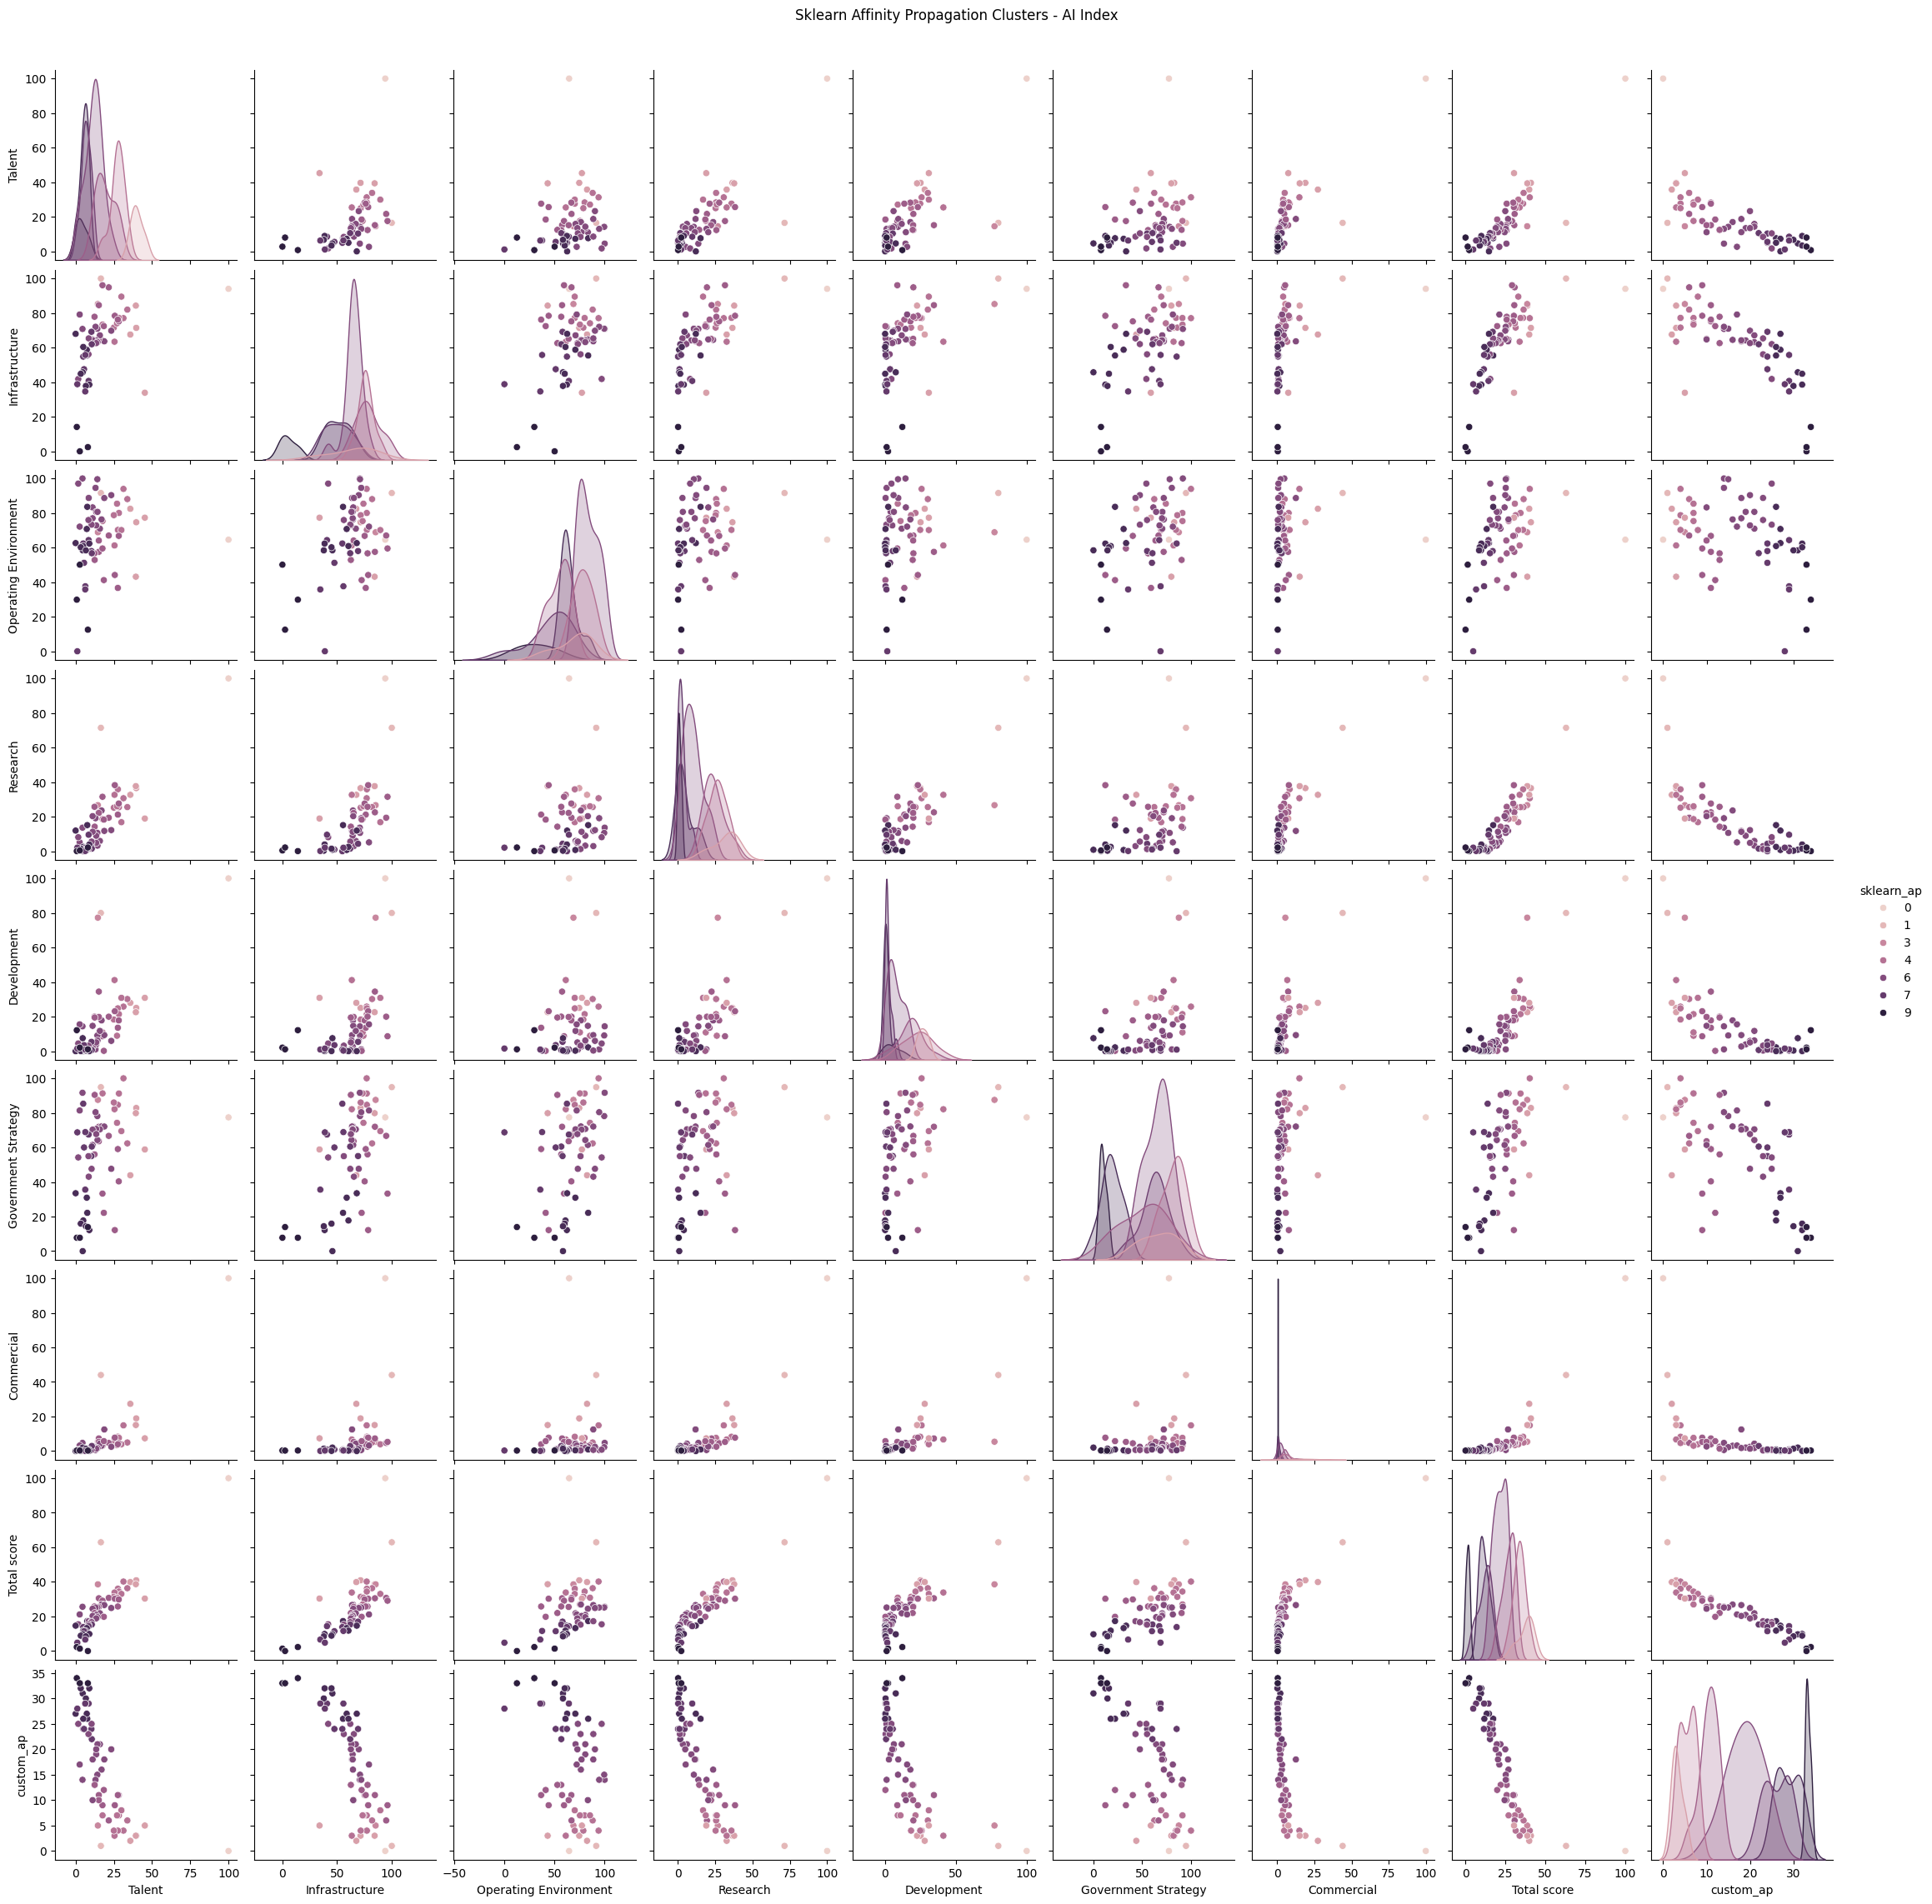

In [ ]:
sns.pairplot(ai, hue='sklearn_ap')
plt.suptitle('Sklearn Affinity Propagation Clusters - AI Index', y=1.02)
plt.show()

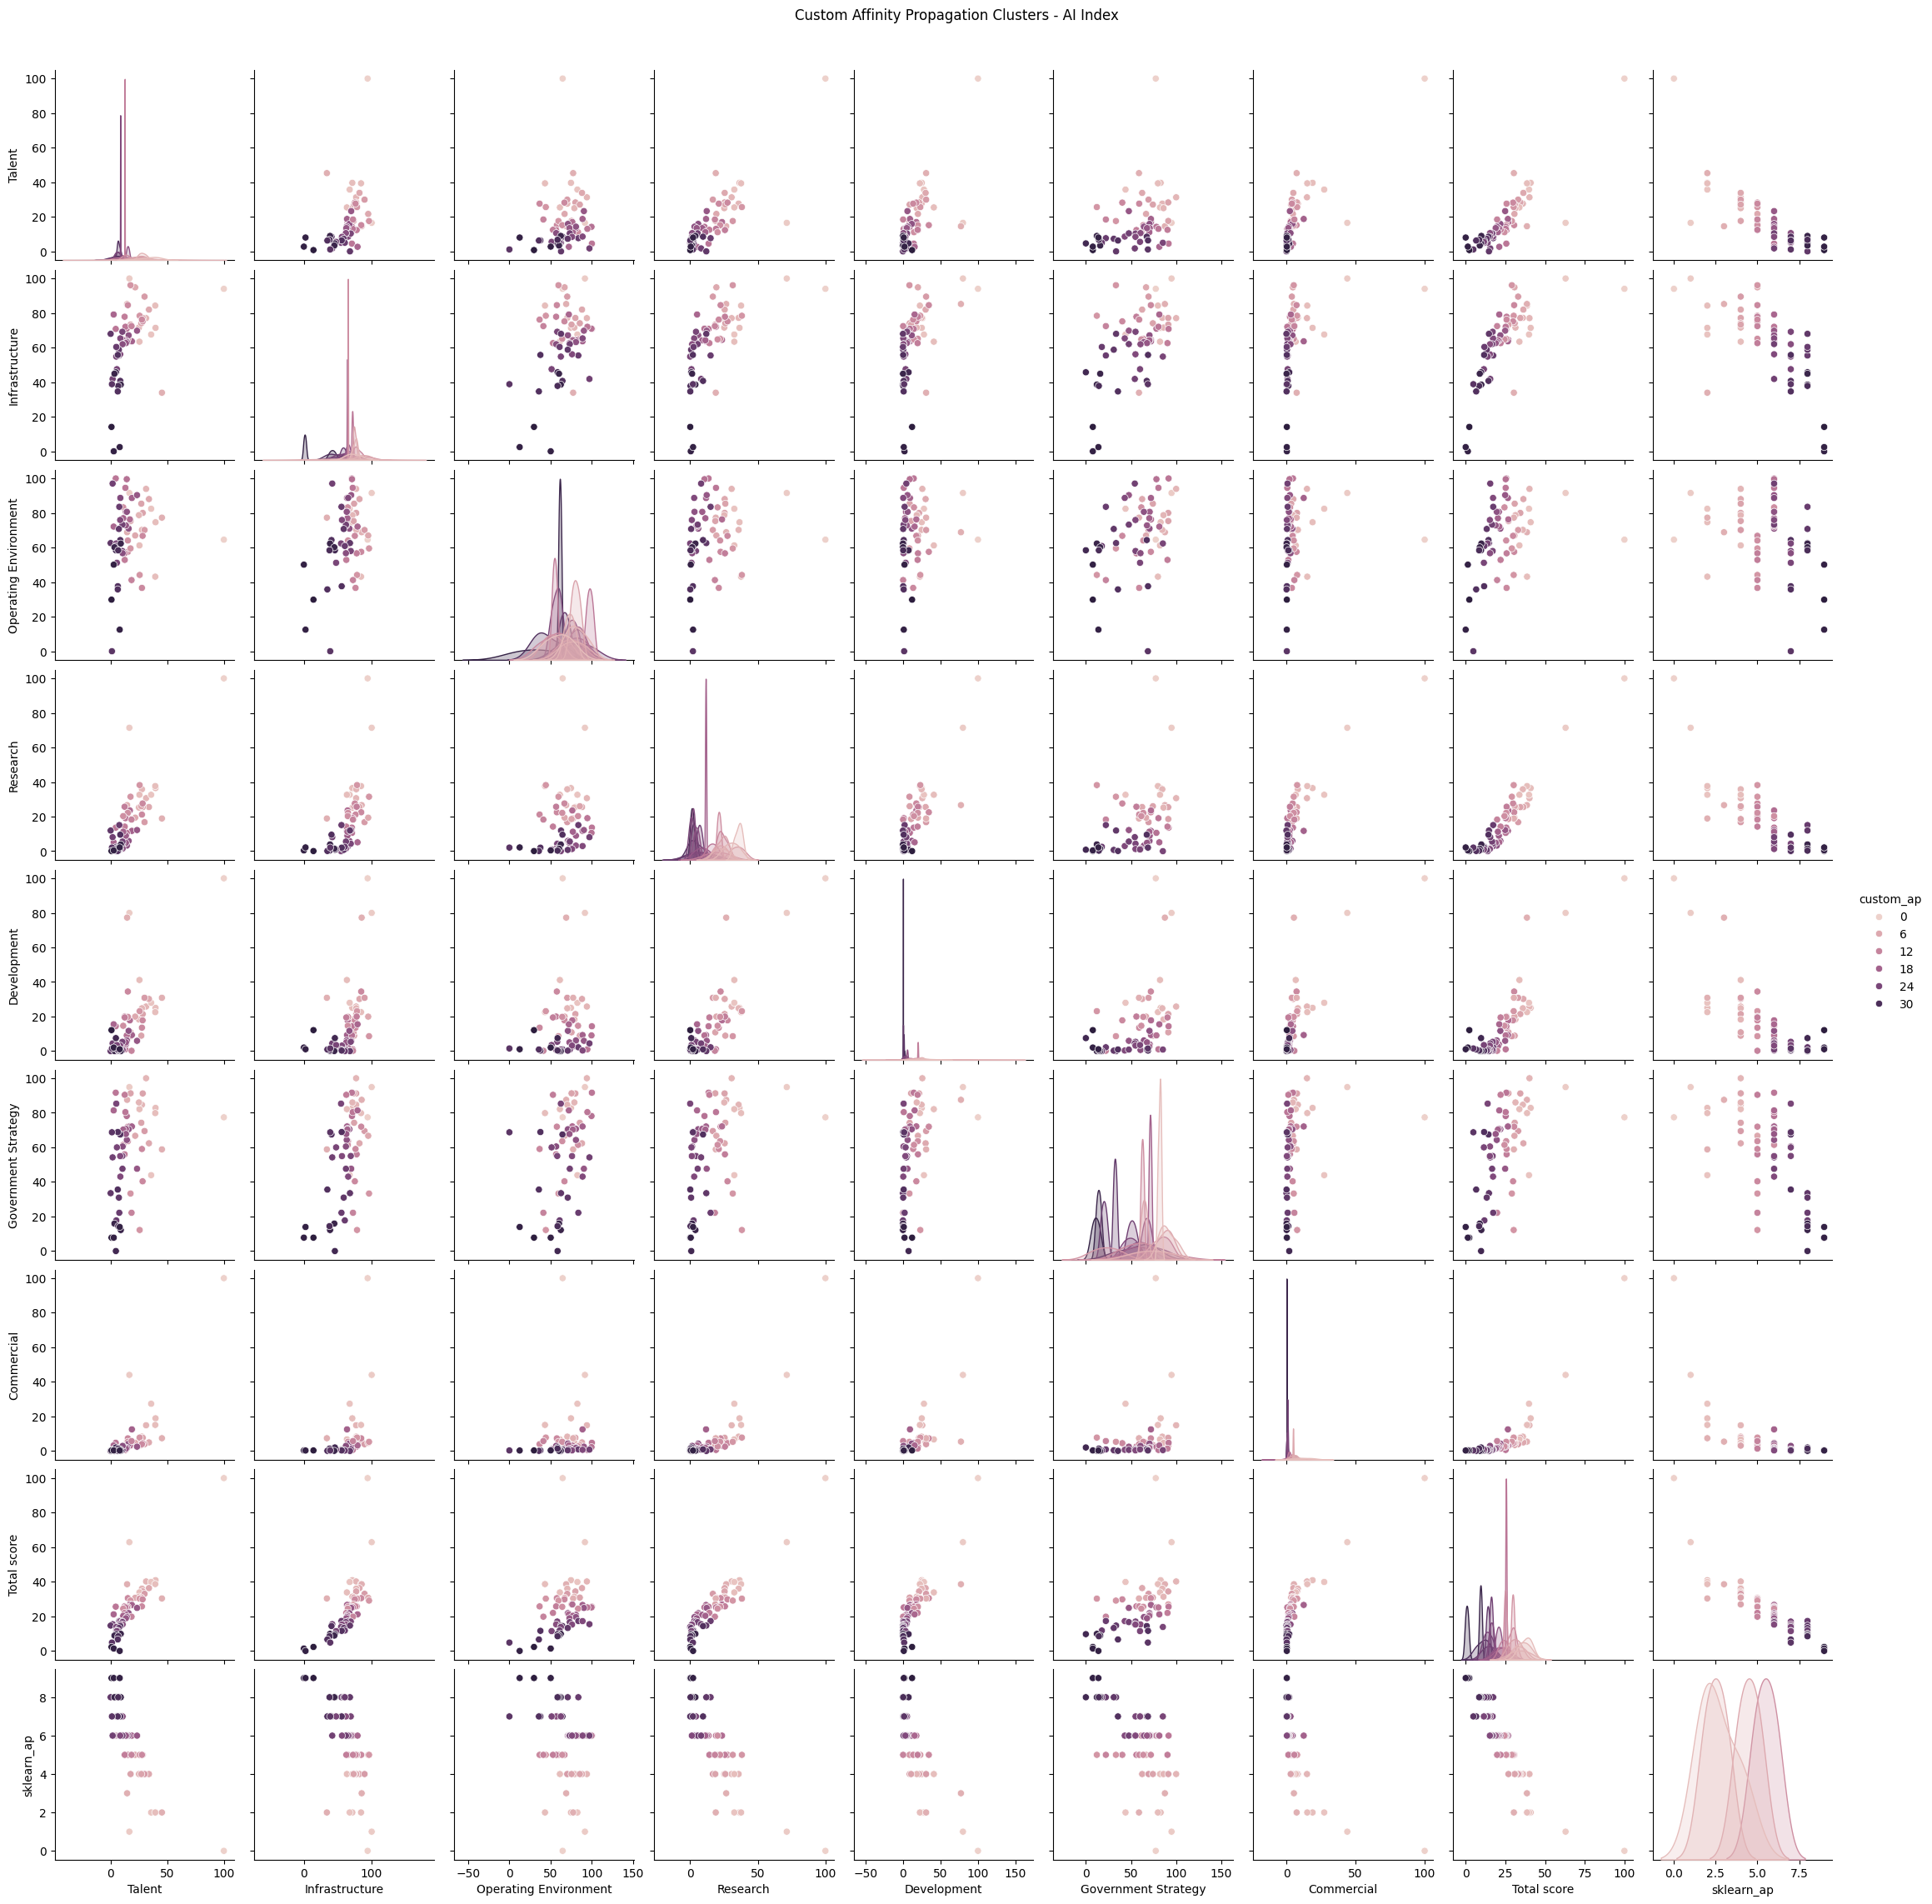

In [ ]:
sns.pairplot(ai, hue='custom_ap')
plt.suptitle('Custom Affinity Propagation Clusters - AI Index', y=1.02)
plt.show()

##  Dataset 3: Earthquakes

In [ ]:
path = kagglehub.dataset_download("shreyasur965/recent-earthquakes")
quake = pd.read_csv(os.path.join(path, "earthquakes.csv"))
quake = quake.select_dtypes(include='number').dropna(axis=1)
X_q = quake
X_q_scaled = StandardScaler().fit_transform(X_q)

100%|██████████| 214k/214k [00:00<00:00, 46.6MB/s]

Extracting files...


In [ ]:
ap_q = AffinityPropagation(random_state=seed).fit(X_q_scaled)
quake['sklearn_ap'] = ap_q.labels_
q_score_sklearn = silhouette_score(X_q_scaled, ap_q.labels_)
print(f'Silhouette Score (Sklearn - Earthquakes): {q_score_sklearn:.3f}')

Silhouette Score (Sklearn - Earthquakes): 0.233


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


###  Visualize Clusters - Earthquake Dataset

In [ ]:
sns.pairplot(quake, hue='sklearn_ap')
plt.suptitle('Sklearn Affinity Propagation Clusters - Earthquakes', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sns.pairplot(quake, hue='custom_ap')
plt.suptitle('Custom Affinity Propagation Clusters - Earthquakes', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ap_custom_q = AffinityPropagationCustom().fit(X_q_scaled)
quake['custom_ap'] = ap_custom_q.labels_
q_score_custom = silhouette_score(X_q_scaled, ap_custom_q.labels_)
print(f'Silhouette Score (Custom - Earthquakes): {q_score_custom:.3f}')

Silhouette Score (Custom - Earthquakes): -0.079


##  Summary of Silhouette Scores

In [ ]:
summary_df = pd.DataFrame({
    'Dataset': ['Iris', 'AI Index', 'Earthquakes'],
    'Sklearn Score': [iris_score_sklearn, ai_score_sklearn, q_score_sklearn],
    'Custom Score': [iris_score_custom, ai_score_custom, q_score_custom]
})
summary_df

,Dataset,Sklearn Score,Custom Score
0,Iris,0.343417,-0.203694
1,AI Index,0.229972,-0.169591
2,Earthquakes,0.233430,-0.078702
